In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy.optimize import curve_fit
import scipy.signal as scs
import numpy.matlib as mlib
import scipy.stats as spyst

In [2]:
# import data
file = "CPITimeSeries.csv"
df = pd.read_csv(file)
None

C:\Users\Gabriel\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245

In [3]:
# drop unnecessary years
year_month = []
for i in range(40):
    for j in range(12):
        pr = f'19{50+i}M{j+1}'
        year_month.append(pr)

df.drop(year_month, axis=1, inplace=True)

# select country data
country = "Netherlands, The"

country_data = df[(df['Country Name'] == country) & (df['Indicator Code'] == 'PCPI_IX') & (df['Attribute'] == 'Value')]

# Extract CPI information
country_cpi_data = country_data.iloc[0, 5:-2].to_numpy(dtype=np.float64)
country_cpi_data = pd.Series(data=country_cpi_data, index=np.arange(len(country_cpi_data)), name="CPI TS")

print("Done")

Done


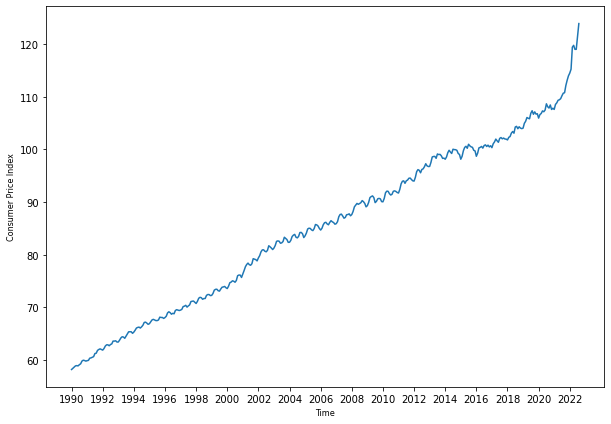

In [4]:
# plot time series
ax = country_cpi_data.plot(figsize=(10,7))
ax.set_ylabel('Consumer Price Index',fontdict={'fontsize':8})
ax.set_xlabel('Time',fontdict={'fontsize':8})

ticks = np.arange(0, len(country_cpi_data), 24)
ticks_labels = np.arange(1990, 2023, 2)
ax.set_xticks(ticks)
ax.set_xticklabels(ticks_labels)
None

In [5]:
#Train=0.7 Test=0.3
train_ds_pct = 0.7
country_cpi_data

train_ds_len = int(len(country_cpi_data) * train_ds_pct)
test_ds_len = len(country_cpi_data) - train_ds_len
print("train: " + str(train_ds_len))
print("test: " + str(test_ds_len))

train_ds = country_cpi_data[:train_ds_len]
test_ds = country_cpi_data[-train_ds_len:]

train: 274
test: 118


## Basic description techniques & transformations

### Trend

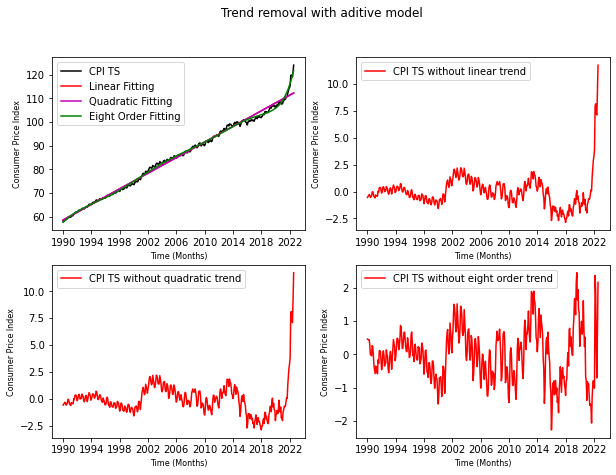

In [6]:
# Fit linear and quadratic trend estimation as additive model
#Linear trend estimation by fitting
months = np.arange(len(country_cpi_data))

coefs=np.polyfit(months,country_cpi_data.array,1)
linVals=np.polyval(coefs,months)
linTS=pd.Series(data=linVals,index=months,name="Linear Fitting")

ticks = np.arange(0, len(country_cpi_data), 48)
ticks_labels = np.arange(1990, 2023, 4)

#Quadratic trend estimation by fitting
coefs=np.polyfit(months,country_cpi_data.array,2)
quadVals=np.polyval(coefs,months)
quadTS=pd.Series(data=quadVals,index=months,name="Quadratic Fitting")

#8th order trend estimation by fitting
coefs=np.polyfit(months,country_cpi_data.array,8)
eightOrder=np.polyval(coefs,months)
eightOrderTs=pd.Series(data=eightOrder,index=months,name="Eight Order Fitting")

# Plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 7))
fig.suptitle('Trend removal with aditive model')

ax=country_cpi_data.plot(ax=ax1, legend=True,color='k', figsize=(10, 7))
linTS.plot(ax=ax1,legend=True,color='r')
quadTS.plot(ax=ax1,legend=True,color='m')
eightOrderTs.plot(ax=ax1,legend=True,color='g', figsize=(10, 7))
ax.set_ylabel('Consumer Price Index',fontdict={'fontsize':8})
ax.set_xlabel('Time (Months)',fontdict={'fontsize':8})
ax.set_xticks(ticks)
ax.set_xticklabels(ticks_labels)

#Remove linear trend
shTsNoLinTrend=country_cpi_data-linTS
shTsNoLinTrend.name="CPI TS without linear trend"
shTsNoLinTrend.plot(ax=ax2, legend=True,color='r', figsize=(10, 7))
ax2.set_ylabel('Consumer Price Index',fontdict={'fontsize':8})
ax2.set_xlabel('Time (Months)',fontdict={'fontsize':8})
ax2.set_xticks(ticks)
ax2.set_xticklabels(ticks_labels)


#Remove quadratic trend
noQuadTrend=country_cpi_data-quadTS
noQuadTrend.name="CPI TS without quadratic trend"
noQuadTrend.plot(ax=ax3, legend=True,color='r', figsize=(10, 7))
ax3.set_ylabel('Consumer Price Index',fontdict={'fontsize':8})
ax3.set_xlabel('Time (Months)',fontdict={'fontsize':8})
ax3.set_xticks(ticks)
ax3.set_xticklabels(ticks_labels)


#Remove 8th order trend
noEightTrend=country_cpi_data-eightOrderTs
noEightTrend.name="CPI TS without eight order trend"
noEightTrend.plot(ax=ax4, legend=True,color='r', figsize=(10, 7))
ax4.set_ylabel('Consumer Price Index',fontdict={'fontsize':8})
ax4.set_xlabel('Time (Months)',fontdict={'fontsize':8})
ax4.set_xticks(ticks)
ax4.set_xticklabels(ticks_labels)
None

We can see that the trends of the first and second order are very similar, in such a way that we don't notice the difference both between the estimations and the time series with the trends removed. <br><br>
We can still see somewhat of a trend in those first two examples, though, particularly that final spike.<br><br>
To compare, we also applied an eight order trend removal, which seems to properly remove the trend. However, an eight order polinomial fit is too complex which will probably lead to overfitting.<br><br>
We conclude that an additive model is not the best choice to analyse/remove the trend from the time series since it doesn't properly remove it unless a very complex polynomial fit is used.

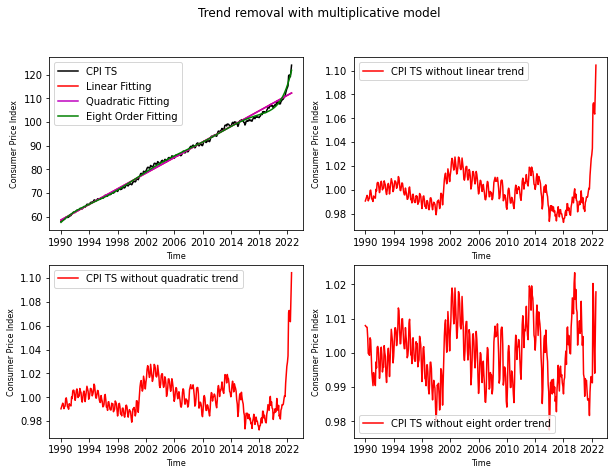

In [7]:
# Fit linear and quadratic trend estimation as multiplicative model
#Linear trend estimation by fitting

ticks = np.arange(0, len(country_cpi_data), 48)
ticks_labels = np.arange(1990, 2023, 4)

# Plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 7))
fig.suptitle('Trend removal with multiplicative model')

ax=country_cpi_data.plot(ax=ax1, legend=True,color='k', figsize=(10, 7))
linTS.plot(ax=ax1,legend=True,color='r')
quadTS.plot(ax=ax1,legend=True,color='m')
eightOrderTs.plot(ax=ax1,legend=True,color='g', figsize=(10, 7))
ax.set_ylabel('Consumer Price Index',fontdict={'fontsize':8})
ax.set_xlabel('Time',fontdict={'fontsize':8})
ax.set_xticks(ticks)
ax.set_xticklabels(ticks_labels)

#Remove linear trend
shTsNoLinTrend=country_cpi_data/linTS
shTsNoLinTrend.name="CPI TS without linear trend"
shTsNoLinTrend.plot(ax=ax2, legend=True,color='r', figsize=(10, 7))
ax2.set_ylabel('Consumer Price Index',fontdict={'fontsize':8})
ax2.set_xlabel('Time',fontdict={'fontsize':8})
ax2.set_xticks(ticks)
ax2.set_xticklabels(ticks_labels)


#Remove quadratic trend
noQuadTrend=country_cpi_data/quadTS
noQuadTrend.name="CPI TS without quadratic trend"
noQuadTrend.plot(ax=ax3, legend=True,color='r', figsize=(10, 7))
ax3.set_ylabel('Consumer Price Index',fontdict={'fontsize':8})
ax3.set_xlabel('Time',fontdict={'fontsize':8})
ax3.set_xticks(ticks)
ax3.set_xticklabels(ticks_labels)


#Remove 8th order trend
noEightTrend=country_cpi_data/eightOrderTs
noEightTrend.name="CPI TS without eight order trend"
noEightTrend.plot(ax=ax4, legend=True,color='r', figsize=(10, 7))
ax4.set_ylabel('Consumer Price Index',fontdict={'fontsize':8})
ax4.set_xlabel('Time',fontdict={'fontsize':8})
ax4.set_xticks(ticks)
ax4.set_xticklabels(ticks_labels)
None

The results observed are very similar to the ones obtained from the additive model, the main difference being the new values of the Time Series. <br>
Once again, unless we adopt a high level polynomial fit, this type of model probably isn't the best one.

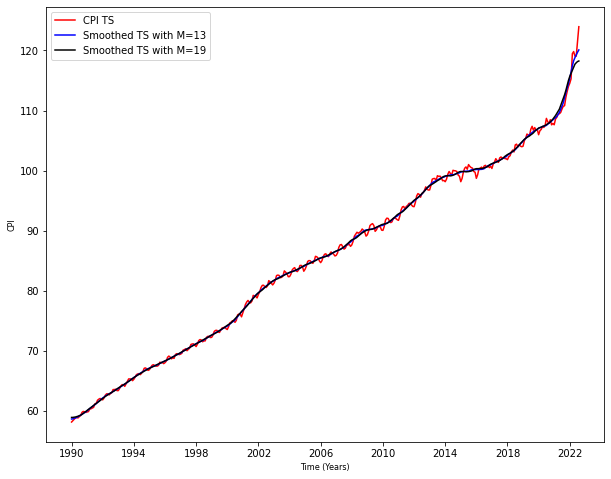

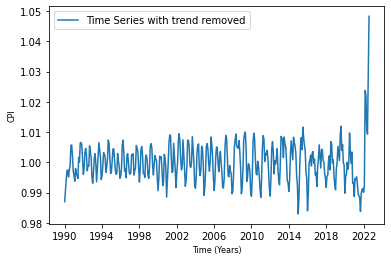

In [8]:
def maSmooth(TSeries,omega,data_aug=False):
    M=omega.shape[0]
    lag=int(np.floor((M-1)/2))
    
    if data_aug: #If smooted TS should have the same number of samples
        TSeriesAug=TSeries.append(np.flip(TSeries[-lag:]))
        TSeriesAug=np.flip(TSeries[0:lag]).append(TSeriesAug)
        
    else:
        TSeriesAug=TSeries
        
    nf=range(lag,TSeriesAug.size-lag)
    xf=np.zeros(TSeriesAug.size-2*(lag)).astype('float')
    for n in nf:
        xf[n-lag]=(1/float(sum(omega)))*np.sum(np.multiply(TSeriesAug[n-lag:n+lag+1],omega))
    xf=pd.Series(data=xf, index=TSeriesAug.index[lag:TSeriesAug.size-lag],name="Smoothed TS with M="+str(M))
    
    return xf
    
M=13
omega=np.ones(M)*(1/float(M))    
smooth5=maSmooth(country_cpi_data,omega,data_aug=True)

M=19
omega=np.ones(M)*(1/float(M))
smooth13=maSmooth(country_cpi_data,omega,data_aug=True)

plt.figure(figsize=(10,8))

ax=country_cpi_data.plot(color='r',legend=True)
smooth5.plot(color='b',legend=True)
smooth13.plot(color='k',legend=True)
ax.set_ylabel('CPI',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)',fontdict={'fontsize':8})
ax.set_xticks(ticks)
ax.set_xticklabels(ticks_labels)


plt.figure()

psNoTrendMA = psNoTrend=country_cpi_data/smooth13
psNoTrend.name="Time Series with trend removed"
ax=psNoTrend.plot(legend=True)
ax.set_ylabel('CPI',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)',fontdict={'fontsize':8})
ax.set_xticks(ticks)
ax.set_xticklabels(ticks_labels)
None

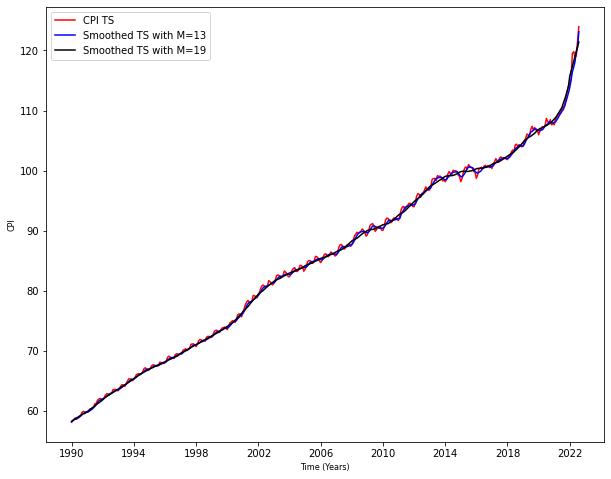

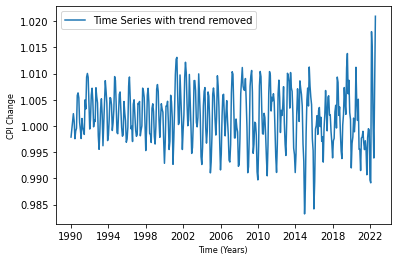

In [201]:
def flin(x,a,b):
    return a*x+b

def xWeights(x,xi,span):
    wi=(1-abs((x-xi)/float(span))**3)**3
    #plt.figure()
    #plt.plot(wi)
    return wi

def yWeights(ri,MAD):
    if np.abs(ri)<6*MAD:
        return (1-((ri/(6*MAD))**2))**2
    else:
        return 0


def loessPass(TSeries,TSeriesE=pd.Series(np.array([])),span=5,timePass=True):
    lag=int((span-1)/2)
    xf=np.zeros(TSeries.size).astype('float')
    for k in range(TSeries.size):
        if k<=lag:
            win=TSeries[0:span]
            if not timePass:
                winE=TSeriesE[0:span]
            xvs=np.array(range(span))
            #print "No inicio"
        elif k>TSeries.size-lag:
            #print "No fim"
            win=TSeries[TSeries.size-span:TSeries.size]
            if not timePass:
                winE=TSeriesE[TSeriesE.size-span:TSeriesE.size]
            xvs=np.array(range(TSeries.size-span,TSeries.size))
        else:
            #print "No meio"
            win=TSeries[k-lag-1:k+lag]
            if not timePass:
                winE=TSeriesE[k-lag-1:k+lag]
            xvs=np.array(range(k-lag,k+lag+1))

        ws=np.zeros(span).astype('float')
            
        if not timePass:
            res=np.array(win-winE)
            #res=res.as_matrix()
            MAD=np.median(np.abs(res))
            
        for xw in range(len(xvs)):
            if timePass:
                ws[xw]=xWeights(k,xvs[xw],np.max((np.abs(k-xvs[0]),np.abs(k-xvs[-1]))))
            else:
                ws[xw]=yWeights(res[xw],MAD)
            #print np.max((np.abs(k-xvs[0]),np.abs(k-xvs[-1])))
        exog = sm.add_constant(xvs)
        
        
        mod_wls = sm.WLS(win, exog, weights=ws)
        res_wls = mod_wls.fit()
        
        xf[k]=res_wls.params[1]*k+res_wls.params[0]
    return xf

def lowess(TSeries,span=5,ftype='linear'):
    
    xf=loessPass(TSeries,span=span,timePass=True)
    xf=loessPass(TSeries,TSeriesE=pd.Series(data=xf, index=TSeries.index),span=span,timePass=False)
    xf=pd.Series(data=xf, index=TSeries.index,name="Smoothed TS with M="+str(M))
    return xf



# psData=pd.read_csv("../data/academicTS/airline-passengers.csv",sep=",",header=0,parse_dates=["Year-Month"])
# psTs=pd.Series(data=np.array(psData["Passengers"]),index=psData["Year-Month"],name="Airline Passengers TS")

M=13
smooth5=lowess(country_cpi_data)

M=19
smooth13=lowess(country_cpi_data,span=M)

plt.figure(figsize=(10,8))

ax=country_cpi_data.plot(color='r',legend=True)
smooth5.plot(color='b',legend=True)
smooth13.plot(color='k',legend=True)
ax.set_ylabel('CPI',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)',fontdict={'fontsize':8})
ax.set_xticks(ticks)
ax.set_xticklabels(ticks_labels)


plt.figure()

psNoTrend=country_cpi_data/smooth13
psNoTrend.name="Time Series with trend removed"
ax=psNoTrend.plot(legend=True)
ax.set_ylabel('CPI Change',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)',fontdict={'fontsize':8})
ax.set_xticks(ticks)
ax.set_xticklabels(ticks_labels)
None

### Seasonality

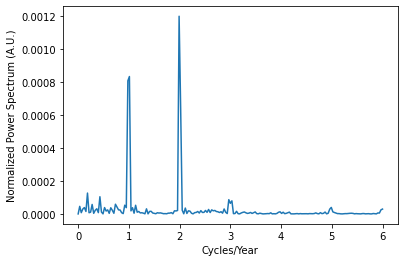

In [202]:
fTS=(np.abs(np.fft.rfft(psNoTrend-psNoTrend.mean()))**2/psNoTrend.size)# Mean was subtracted because 
#we want the evaluate the importance of the non-null frequency components

# psNoTrend = psNoTrendMA

samp_freq=12 #12 samples/year
f=np.fft.rfftfreq(psNoTrend.size, d=1/samp_freq)
plt.figure()
plt.plot(f,fTS)
plt.xlabel("Cycles/Year")
plt.ylabel("Normalized Power Spectrum (A.U.)")
None

As we can see from the FT of our TS, the most important component is located at 2 Cycle/year, the most important seasonality component is 6 months.

MSE: 3.185680835439947e-06


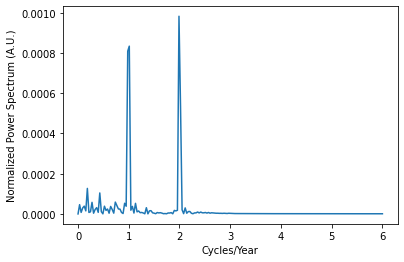

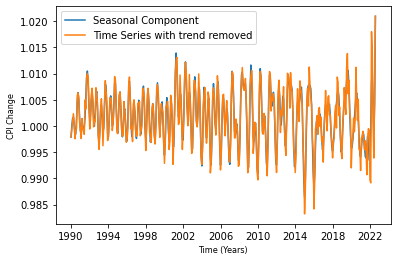

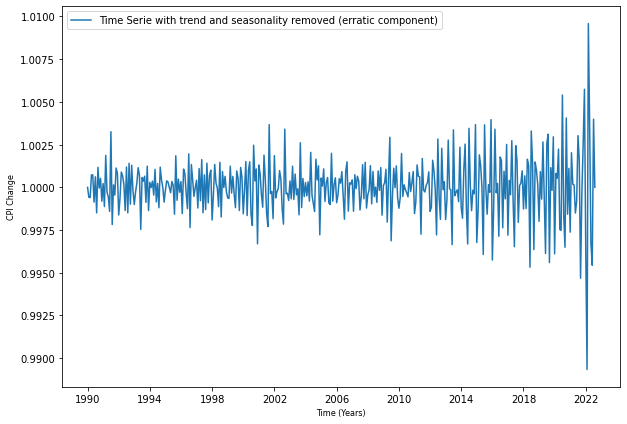

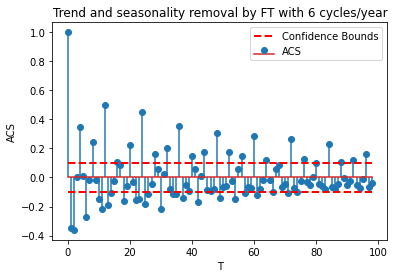

In [203]:
sos=scs.butter(N=5,fs=12,Wn=[2.4],btype='lowpass',output='sos')

Seasonal = scs.sosfiltfilt(sos,psNoTrend)


#Lets look at the filter effect
fTS=(np.abs(np.fft.rfft(Seasonal-np.mean(Seasonal)))**2/psNoTrend.size)# Mean was subtracted because 
#we want the evaluate the importance of the non-null frequency components

samp_freq=12 #12 samples/year
f=np.fft.rfftfreq(psNoTrend.size, d=1/samp_freq)
plt.figure()
plt.plot(f,fTS)
plt.xlabel("Cycles/Year")
plt.ylabel("Normalized Power Spectrum (A.U.)")


#Plot Seasonal component as compared with the TS without trend
SeaTS=pd.Series(data=Seasonal,index=country_cpi_data.index,name="Seasonal Component")
plt.figure()
SeaTS.plot(legend=True)
ax=psNoTrend.plot(legend=True)
ax.set_ylabel('CPI Change',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)',fontdict={'fontsize':8})
ax.set_xticks(ticks)
ax.set_xticklabels(ticks_labels)

#Remove seasonal component by assuming the multiplicative model
psNoTrendNoSeas=psNoTrend/SeaTS
psNoTrendNoSeas.name="Time Serie with trend and seasonality removed (erratic component)"

plt.figure(figsize=(10,7))
ax=psNoTrendNoSeas.plot(legend=True)
ax.set_ylabel('CPI Change',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)',fontdict={'fontsize':8})
ax.set_xticks(ticks)
ax.set_xticklabels(ticks_labels)


autocorr(psNoTrendNoSeas, "Trend and seasonality removal by FT with 6 cycles/year")

# calculate error
mse = mean_squared_error(psNoTrend, SeaTS)
print(f"MSE: {mse}")
None


Looking at the seasonal component and the time series without trend, it is possible to observe that the seasonality fits almost perfectly the TS and if we focus on the erratic component we can see that the behaviour is very erratic and noisy, without obvious patterns, so we can conclude that removing 2 Cycle/Year gives good results.

But as a way of comparing to see if it really is the best result we are going to remove the 3 Cycle/Year.

MSE: 1.516471026710132e-06


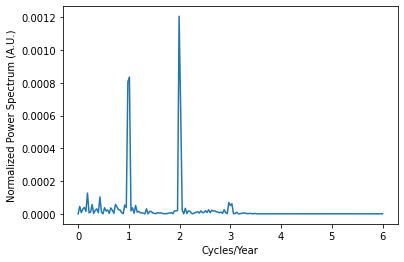

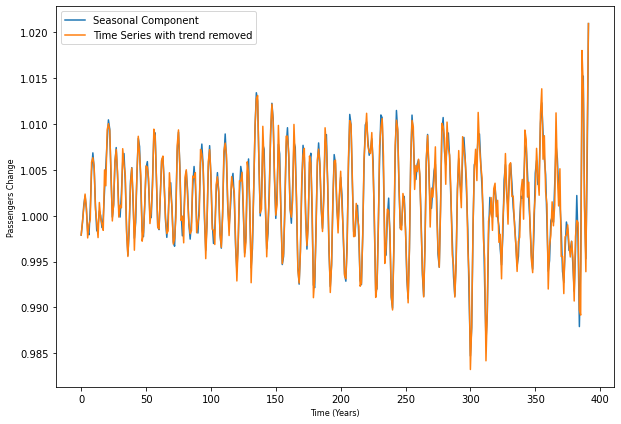

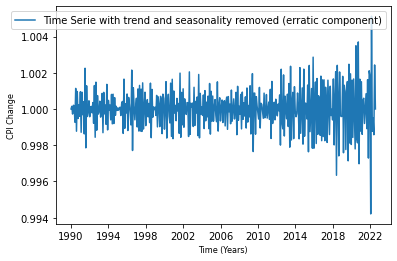

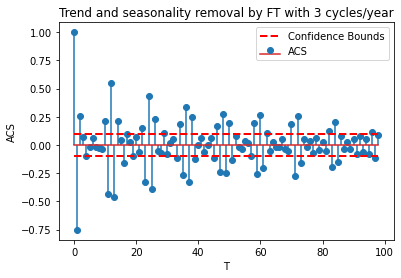

In [204]:
sos=scs.butter(N=5,fs=12,Wn=[3.4],btype='lowpass',output='sos')#Now the filter will accept the 2nd and 3rd comp.

Seasonal = scs.sosfiltfilt(sos,psNoTrend)


#Lets look at the filter effect
fTS=(np.abs(np.fft.rfft(Seasonal-np.mean(Seasonal)))**2/psNoTrend.size)# Mean was subtracted because 
#we want the evaluate the importance of the non-null frequency components

samp_freq=12 #12 samples/year
f=np.fft.rfftfreq(psNoTrend.size, d=1/samp_freq)
plt.figure()
plt.plot(f,fTS)
plt.xlabel("Cycles/Year")
plt.ylabel("Normalized Power Spectrum (A.U.)")


#Plot Seasonal component as compared with the TS without trend
SeaTS=pd.Series(data=Seasonal,index=country_cpi_data.index,name="Seasonal Component")
plt.figure()
SeaTS.plot(legend=True, figsize=(10,7))
ax=psNoTrend.plot(legend=True)
ax.set_ylabel('Passengers Change',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)',fontdict={'fontsize':8})

# calculate error
mse = mean_squared_error(psNoTrend, SeaTS)

#Remove seasonal component by assuming the multiplicative model
psNoTrendNoSeas=psNoTrend/SeaTS
psNoTrendNoSeas.name="Time Serie with trend and seasonality removed (erratic component)"

plt.figure()
ax=psNoTrendNoSeas.plot(legend=True)
ax.set_ylabel('CPI Change',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)',fontdict={'fontsize':8})

ax.set_xticks(ticks)
ax.set_xticklabels(ticks_labels)

autocorr(psNoTrendNoSeas, "Trend and seasonality removal by FT with 3 cycles/year")

print(f"MSE: {mse}")
None


Now has we can see the behaviour is not so erratic as before and we can observe some patterns, even though the seasonality fits pretty well the TS.

Epoch Averaging

MSE: 1.2844547131962497e-05


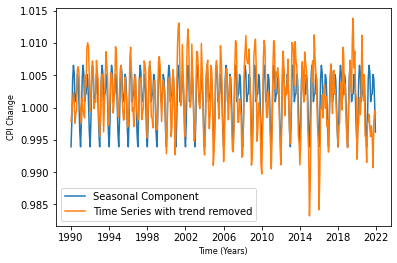

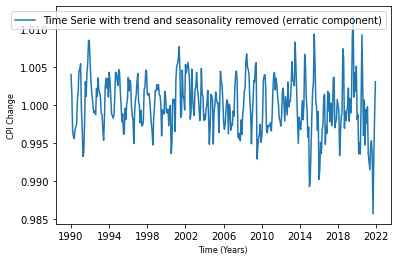

In [205]:
#epoch averaging
S=12

N=psNoTrend.size

C=int(np.floor(N/S))
psNoTrend=psNoTrend[0:C*S]

reshTS=np.array(psNoTrend).reshape((C,S))#Reshape 1 column per month

ac=np.tile(np.mean(reshTS,axis=0),(C,))

SeaTS=pd.Series(data=ac,index=psNoTrend.index,name="Seasonal Component")
plt.figure()
SeaTS.plot(legend=True)
ax=psNoTrend.plot(legend=True)
ax.set_ylabel('CPI Change',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)',fontdict={'fontsize':8})
ax.set_xticks(ticks)
ax.set_xticklabels(ticks_labels)

# calculate error
mse = mean_squared_error(psNoTrend, SeaTS)

#Remove seasonal component by assuming the multiplicative model
psNoTrendNoSeas=psNoTrend/SeaTS
psNoTrendNoSeas.name="Time Serie with trend and seasonality removed (erratic component)"

plt.figure()
ax=psNoTrendNoSeas.plot(legend=True)
ax.set_ylabel('CPI Change',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years)',fontdict={'fontsize':8})
ax.set_xticks(ticks)
ax.set_xticklabels(ticks_labels)

print(f"MSE: {mse}")
None

# differencing

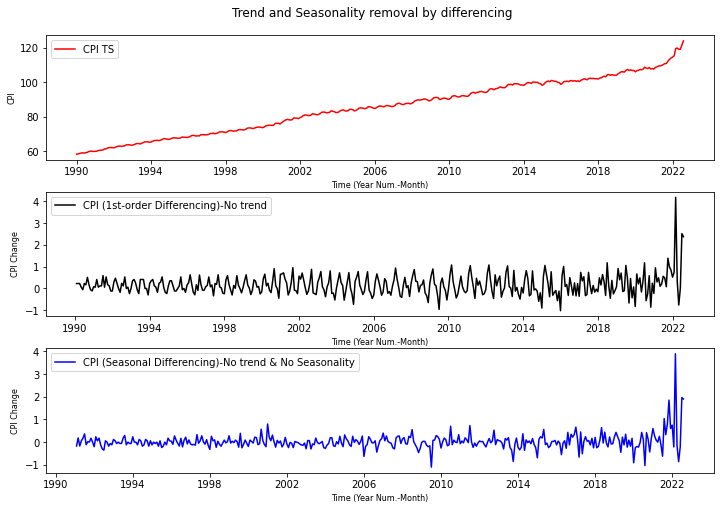

In [73]:
fig, axs=plt.subplots(3, figsize=(10,7))
fig.suptitle('Trend and Seasonality removal by differencing')
fig.tight_layout()
country_cpi_data.plot(ax=axs[0],legend=True,color='r')
axs[0].set_ylabel('CPI',fontdict={'fontsize':8})
axs[0].set_xlabel('Time (Year Num.-Month)',fontdict={'fontsize':8})
axs[0].set_xticks(ticks)
axs[0].set_xticklabels(ticks_labels)

d1psTS=country_cpi_data.diff().dropna()
d1psTS.name="CPI (1st-order Differencing)-No trend"
d1psTS.plot(ax=axs[1],legend=True,color='k')
axs[1].set_ylabel('CPI Change',fontdict={'fontsize':8})
axs[1].set_xlabel('Time (Year Num.-Month)',fontdict={'fontsize':8})
axs[1].set_xticks(ticks)
axs[1].set_xticklabels(ticks_labels)

d2psTS=d1psTS.diff(12).dropna()
d2psTS.name="CPI (Seasonal Differencing)-No trend & No Seasonality"
d2psTS.plot(ax=axs[2],legend=True,color='b')
axs[2].set_ylabel('CPI Change',fontdict={'fontsize':8})
axs[2].set_xlabel('Time (Year Num.-Month)',fontdict={'fontsize':8})
axs[2].set_xticks(ticks)
axs[2].set_xticklabels(ticks_labels)

None

# Confidence Bounds

In [78]:
def autocov(timeserie,T=0):
    N=timeserie.size
    mu=timeserie.mean()
    covCoef=0
    for n in range(0,N-T-1):
        covCoef=covCoef+(timeserie[n]-mu)*(timeserie[n+T]-mu)
    return covCoef/float(np.abs(N))
        

def autocoef(timeserie,T=0):
    return autocov(timeserie,T)/autocov(timeserie)

def correlogram(timeserie,maxT,twoside=False):
    N=timeserie.size
    if twoside:
        corrl=np.zeros(2*maxT+1)
        ix=np.array(range(maxT+1))
        ix=np.concatenate((-np.flip(ix[1:]),ix),axis=0)
    else:
        corrl=np.zeros(maxT+1)  
        ix=np.array(range(maxT+1))
    
    for i in range(maxT+1):
        if twoside:
            corrl[i+maxT]=autocoef(timeserie,i)
            if i>0:
                corrl[maxT-i]=corrl[i+maxT]
        else:
            corrl[i]=autocoef(timeserie,i)
    d = {'ACS':corrl, 'upsig':np.ones(maxT+1)*(1.96/np.sqrt(N)),'dnsig':-np.ones(maxT+1)*(1.96/np.sqrt(N))}
    corrl=pd.DataFrame(data=d,index=ix)
    return corrl

def autocorr(data, title):
    N=len(data)

    wnTS=data.array

    corrl=correlogram(wnTS,int(N/4))

    plt.figure()
    plt.title(title)

    corrl.name='White noise ACS'
    plt.stem(corrl.index,corrl['ACS'],label='ACS')
    plt.plot(corrl.index,corrl['upsig'],linestyle='--', color='r', linewidth=2,label='Confidence Bounds')
    plt.plot(corrl.index,corrl['dnsig'],linestyle='--', color='r', linewidth=2)
    #axs[1].legend('White noise ACS')
    plt.xlabel("T")
    plt.ylabel("ACS")
    plt.legend()


Test results with autocorrelation

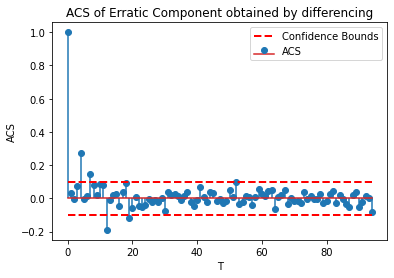

In [76]:

autocorr(d2psTS, "ACS of Erratic Component obtained by differencing")
# autocorr(psNoTrendNoSeas, "Trend and seasonality removal by Epoch Averaging")

None